In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

# Example data
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred_prob = [0.9, 0.4, 0.8, 0.3, 0.2, 0.7, 0.1, 0.6, 0.4, 0.2]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)

print(precision)

[0.5        0.55555556 0.71428571 0.66666667 0.75       1.
 1.         1.         1.        ]


In [4]:
print(recall)

[1.  1.  1.  0.8 0.6 0.6 0.4 0.2 0. ]


In [5]:
print(thresholds)

[0.1 0.2 0.3 0.4 0.6 0.7 0.8 0.9]


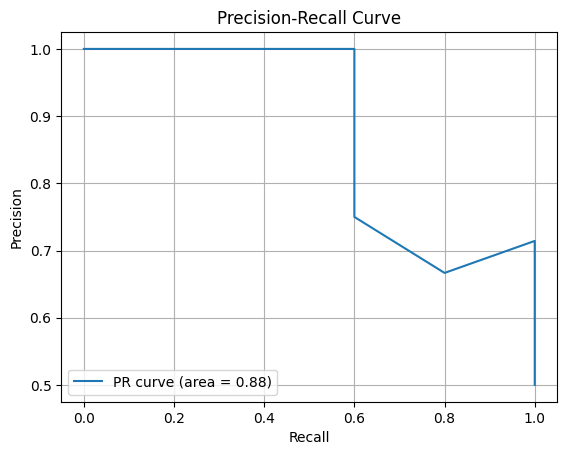

In [6]:
# Calculate AUC for Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Precision-Recall Curve 计算解析

在使用 `sklearn.metrics.precision_recall_curve` 函数时，返回的 `precision` 数组表示不同阈值下的精度（Precision），这些值如何计算出来呢？以下是具体的计算过程。

#### 1. 数据回顾

- **真实标签 `y_true`**：`[1, 0, 1, 1, 0, 1, 0, 0, 1, 0]`
- **预测概率 `y_pred_prob`**：`[0.9, 0.4, 0.8, 0.3, 0.2, 0.7, 0.1, 0.6, 0.4, 0.2]`

#### 2. Precision 和 Recall 计算的基本定义

- **Precision**（精度）：模型预测为正类的样本中，真正为正类的比例。

  \[
  \text{Precision} = \frac{TP}{TP + FP}
  \]

- **Recall**（召回率）：在所有真实为正类的样本中，模型正确预测为正类的比例。
  
  \[
  \text{Recall} = \frac{TP}{TP + FN}
  \]

#### 3. `precision_recall_curve` 的工作机制

`precision_recall_curve` 会遍历所有可能的概率阈值（在这里是 `[0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]`），在每个阈值上将预测概率大于等于该值的样本预测为正类（`1`），小于该值的预测为负类（`0`）。根据这个分类结果，分别计算 Precision 和 Recall。

#### 4. 精确率（Precision）的计算过程

让我们逐步计算这些阈值下的 Precision：

- **阈值为 0.1**：
  - **预测情况**：所有样本都被预测为正类（`1`），5 个 True Positives，5 个 False Positives。
  - **Precision**：`5 / (5 + 5) = 0.5`

- **阈值为 0.2**：
  - **预测情况**：预测概率 ≥ 0.2 的样本被预测为正类，5 个 True Positives，4 个 False Positives。
  - **Precision**：`5 / (5 + 4) ≈ 0.55555556`

- **阈值为 0.3**：
  - **预测情况**：5 个 True Positives，2 个 False Positives。
  - **Precision**：`5 / (5 + 2) ≈ 0.71428571`

- **阈值为 0.4**：
  - **预测情况**：4 个 True Positives，2 个 False Positives。
  - **Precision**：`4 / (4 + 2) ≈ 0.66666667`

- **阈值为 0.6**：
  - **预测情况**：3 个 True Positives，1 个 False Positive。
  - **Precision**：`3 / (3 + 1) = 0.75`

- **阈值为 0.7**：
  - **预测情况**：2 个 True Positives，0 个 False Positives。
  - **Precision**：`2 / (2 + 0) = 1.0`

- **阈值为 0.8 和 0.9**：
  - **预测情况**：1 个 True Positive，0 个 False Positives。
  - **Precision**：`1 / (1 + 0) = 1.0`

#### 5. 总结

`precision_recall_curve` 根据不同的阈值计算出 Precision 和 Recall。随着阈值的增加，Precision 逐渐升高，最后达到 1.0。这解释了为何 `precision` 数组的输出为：

```python
[0.5, 0.55555556, 0.71428571, 0.66666667, 0.75, 1., 1., 1., 1.]
